In [25]:
import arrow
import json
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt

In [26]:
with open('backupWithCo2.jsonr', 'r') as f:
    obj = map(json.loads, f.readlines())
print '%d objects loaded' % len(obj)

73892 objects loaded


In [27]:
country_codes = [
    'AT',
    'DE',
    'DK',
    'ES',
    'FR',
    'GB',
    'NO',
    'PT',
    'SE',
];

In [28]:
def parse_entry(entry):
    vector = []
    dt = None
    for country_code in country_codes:
        country_data = entry.get(country_code, None)
        if country_data:
            if not dt: dt = arrow.get(country_data['data']['datetime']['$date']).datetime
            vector += [country_data['data']['co2intensity']]
        else: vector += [None]
      
    vector.insert(0, dt)
    return vector

In [29]:
data = np.array(map(parse_entry, obj))
#data = data[35:]

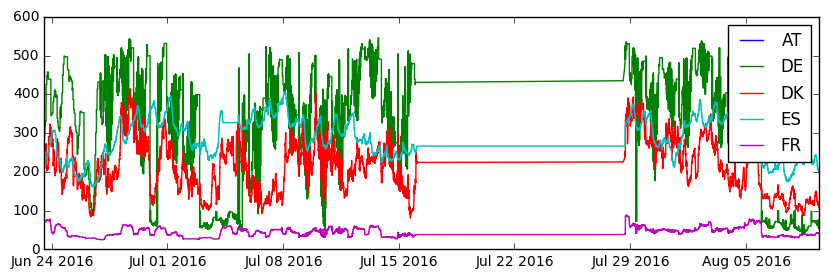

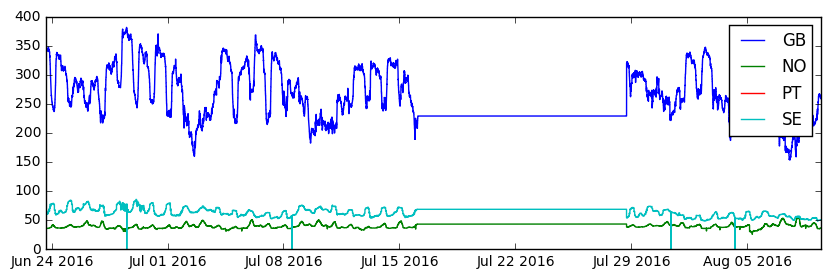

In [30]:
i1 = np.array(range(5))
i2 = np.array(range(i1[-1] + 1, len(country_codes)))

plt.figure(figsize=(10,3))
plt.plot(data[:,0], data[:, i1+1]);
plt.legend(np.array(country_codes)[i1])

plt.figure(figsize=(10,3))
plt.plot(data[:,0], data[:, i2+1]);
plt.legend(np.array(country_codes)[i2])

In [37]:
# Add time since dawn
def seconds_since_midnight(now):
    now = arrow.get(now)
    return (now - now.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()
tod = np.array(map(seconds_since_midnight, data[:, 0]))

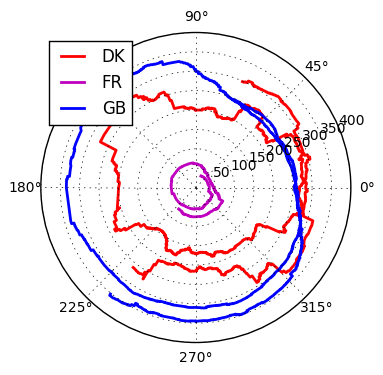

In [56]:
tod_rad = tod / (24.0 * 3600.0) * 2.0 * np.pi
ax = plt.subplot(111, projection='polar')
ax.plot(tod_rad[:3000], data[:3000, 2+1], color='r', linewidth=2)
ax.plot(tod_rad[:3000], data[:3000, 4+1], color='m', linewidth=2)
ax.plot(tod_rad[:3000], data[:3000, 5+1], color='b', linewidth=2)
#ax.set_rmax(2.0)
ax.grid(True)
ax.legend(['DK', 'FR', 'GB'], loc=0)

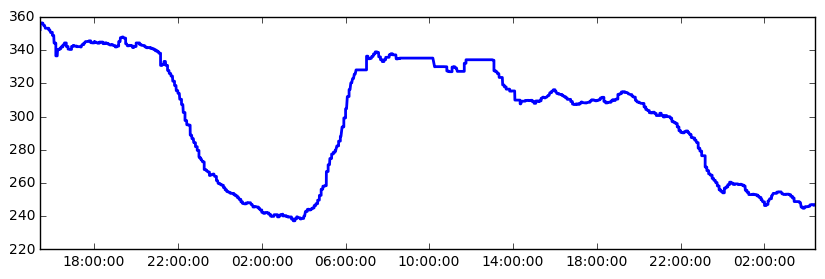

In [54]:
plt.figure(figsize=(10,3))
plt.plot(data[:3000, 0], data[:3000, 5+1], color='b', linewidth=2)